<a href="https://colab.research.google.com/github/rajy4683/S13EVA4/blob/master/S13EVA4_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sun Apr 26 16:31:10 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import sys

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Dependencies


In [3]:
%cd /content/drive/My\ Drive/EVA4/tsai/YoloV3_pre


/content/drive/My Drive/EVA4/tsai/YoloV3_pre


In [0]:
%cd /content/drive/My\ Drive/EVA4/tsai/YoloV3_pre
!wget https://pjreddie.com/media/files/yolov3.weights

/content/drive/My Drive/EVA4/tsai/YoloV3_pre
--2020-04-25 08:03:45--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  4.10MB/s    in 90s     

2020-04-25 08:05:15 (2.63 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [0]:
%cd /content/drive/My\ Drive/EVA4/tsai/YoloV3_pre/
!python yolo_object_detection.py

/content/drive/My Drive/EVA4/tsai/YoloV3_pre
./yolov3.weights ./yolov3.cfg ./coco.names
[[0]
 [4]
 [5]
 [6]
 [1]
 [3]]
: cannot connect to X server 


In [0]:
import cv2
import numpy as np
import os

In [13]:
base_path = "./" 
#"/content/drive/My Drive/EVA4/tsai/YoloV3_pre/"
weights_file = os.path.join(base_path,"yolov3.weights")
cfg_file = os.path.join(base_path,"yolov3.cfg")
coconames_file  = os.path.join(base_path,"coco.names")
print(weights_file, cfg_file, coconames_file)

net = cv2.dnn.readNet(weights_file, cfg_file)
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

# Loading image
img_filename = os.path.join("/content/drive/My Drive/EVA4/tsai/YoloV3_pre/","CoffeeMan.JPG")
img = cv2.imread(img_filename)
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape

# Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

net.setInput(blob)
outs = net.forward(output_layers)

./yolov3.weights ./yolov3.cfg ./coco.names


In [15]:
# Showing informations on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
print(indexes)
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y + 30), font, 3, color, 3)


[[0]
 [4]
 [5]
 [6]
 [1]
 [3]]


In [16]:
cv2.imwrite("Annotated.JPG", img)

True

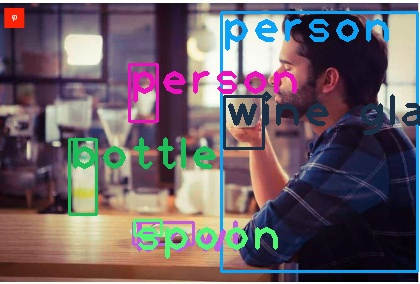

In [17]:
from IPython.display import Image, clear_output 

#for file_name in glob.glob('/content/drive/My Drive/EVA4/tsai/YoloV3_2/snips/*'):
Image(filename='/content/drive/My Drive/EVA4/tsai/YoloV3_pre/Annotated.JPG', width=600)